In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load all trips and get SOC change statistics
trip_files = sorted(glob('BMW_i3_Dataset/Trip*.csv'))
trip_info = []

for trip_file in trip_files:
    trip = pd.read_csv(trip_file, sep=';', encoding='latin-1')
    trip_name = trip_file.split('\\')[-1].replace('.csv', '')
    
    soc_start = trip['SoC [%]'].iloc[0]
    soc_end = trip['SoC [%]'].iloc[-1]
    soc_change = soc_start - soc_end
    duration_min = trip['Time [s]'].max() / 60
    
    trip_info.append({
        'Trip': trip_name,
        'Category': 'Summer (A)' if 'TripA' in trip_name else 'Winter (B)',
        'SOC_Start': soc_start,
        'SOC_End': soc_end,
        'SOC_Change': soc_change,
        'Duration_min': duration_min
    })

trips_summary = pd.DataFrame(trip_info)

# Find max SOC change for summer and winter
summer_trips = trips_summary[trips_summary['Category'] == 'Summer (A)']
winter_trips = trips_summary[trips_summary['Category'] == 'Winter (B)']

max_summer = summer_trips.loc[summer_trips['SOC_Change'].idxmax()]
max_winter = winter_trips.loc[winter_trips['SOC_Change'].idxmax()]

print(f"Total trips: {len(trips_summary)}")
print(f"Summer trips: {len(summer_trips)}, Winter trips: {len(winter_trips)}")
print(f"\nMax SOC Change (Summer): {max_summer['Trip']} - {max_summer['SOC_Change']:.1f}% over {max_summer['Duration_min']:.1f} min")
print(f"Max SOC Change (Winter): {max_winter['Trip']} - {max_winter['SOC_Change']:.1f}% over {max_winter['Duration_min']:.1f} min")

print(f"\nAll trips sorted by SOC change:")
print(trips_summary.sort_values('SOC_Change', ascending=False)[['Trip', 'Category', 'SOC_Change', 'Duration_min']])

Total trips: 70
Summer trips: 32, Winter trips: 38

Max SOC Change (Summer): TripA07 - 29.2% over 34.9 min
Max SOC Change (Winter): TripB14 - 85.5% over 63.7 min

All trips sorted by SOC change:
       Trip    Category  SOC_Change  Duration_min
45  TripB14  Winter (B)        85.5     63.698333
6   TripA07  Summer (A)        29.2     34.886667
32  TripB01  Winter (B)        28.7     54.195000
31  TripA32  Summer (A)        27.0     27.868333
5   TripA06  Summer (A)        21.7     52.740000
..      ...         ...         ...           ...
63  TripB32  Winter (B)         NaN     13.261667
65  TripB34  Winter (B)         NaN     12.228333
66  TripB35  Winter (B)         NaN     22.708333
67  TripB36  Winter (B)         NaN     47.536667
68  TripB37  Winter (B)         NaN     23.620000

[70 rows x 4 columns]


In [18]:
# Load the trip with max SoC change
df = pd.read_csv('BMW_i3_Dataset/TripB14.csv', sep=';', encoding='latin-1')
print(f"Shape: {df.shape}")
print(f"Duration: {df['Time [s]'].max()/60:.1f} minutes")
df.head()

Shape: (38220, 48)
Duration: 63.7 minutes


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,500.0,0.0,0.0,-0.24,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.60,9.83,5.29,4.15,4.59,5.46
1,0.1,0.0,500.0,0.0,0.0,-0.27,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.60,9.83,5.29,4.15,4.59,5.46
2,0.2,0.0,500.0,0.0,0.0,-0.27,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.60,9.83,5.29,4.15,4.59,5.46
3,0.3,0.0,500.0,0.0,0.0,-0.25,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.59,9.84,5.29,4.15,4.59,5.47
4,0.4,0.0,500.0,0.0,0.0,-0.24,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.94,2.93,8.57,9.87,5.29,4.16,4.60,5.48


In [19]:
# Check data types and missing values
print("Missing values:", df.isnull().sum().sum())
print("\nColumns:")
print(df.columns.tolist())

Missing values: 62

Columns:
['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Ambient Temperature Sensor [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Temperature Defrost lateral right [°C]

In [20]:
# Correlation analysis - which features predict SoC?
numeric_df = df.select_dtypes(include=[np.number])
soc_correlations = numeric_df.corr()['SoC [%]'].abs().sort_values(ascending=False)

print("Top 15 features correlated with SoC:")
print("="*60)
print(soc_correlations.head(15))
print(f"\nFeatures with |correlation| > 0.5: {(soc_correlations > 0.5).sum() - 1}")  # -1 for SoC itself
print(f"Features with |correlation| > 0.3: {(soc_correlations > 0.3).sum() - 1}")
print(f"Features with |correlation| > 0.1: {(soc_correlations > 0.1).sum() - 1}")

Top 15 features correlated with SoC:
SoC [%]                            1.000000
displayed SoC [%]                  0.999914
Time [s]                           0.994975
max. Battery Temperature [°C]      0.993166
Battery Temperature [°C]           0.989468
Battery Voltage [V]                0.732798
Heater Voltage [V]                 0.719693
Cabin Temperature Sensor [°C]      0.648184
Temperature Head Co-Driver [°C]    0.607764
Temperature Head Driver [°C]       0.508023
Requested Heating Power [W]        0.432404
Heating Power LIN [W]              0.431928
Heating Power CAN [kW]             0.430982
Heater Current [A]                 0.404779
Ambient Temperature [°C]           0.349654
Name: SoC [%], dtype: float64

Features with |correlation| > 0.5: 9
Features with |correlation| > 0.3: 15
Features with |correlation| > 0.1: 28


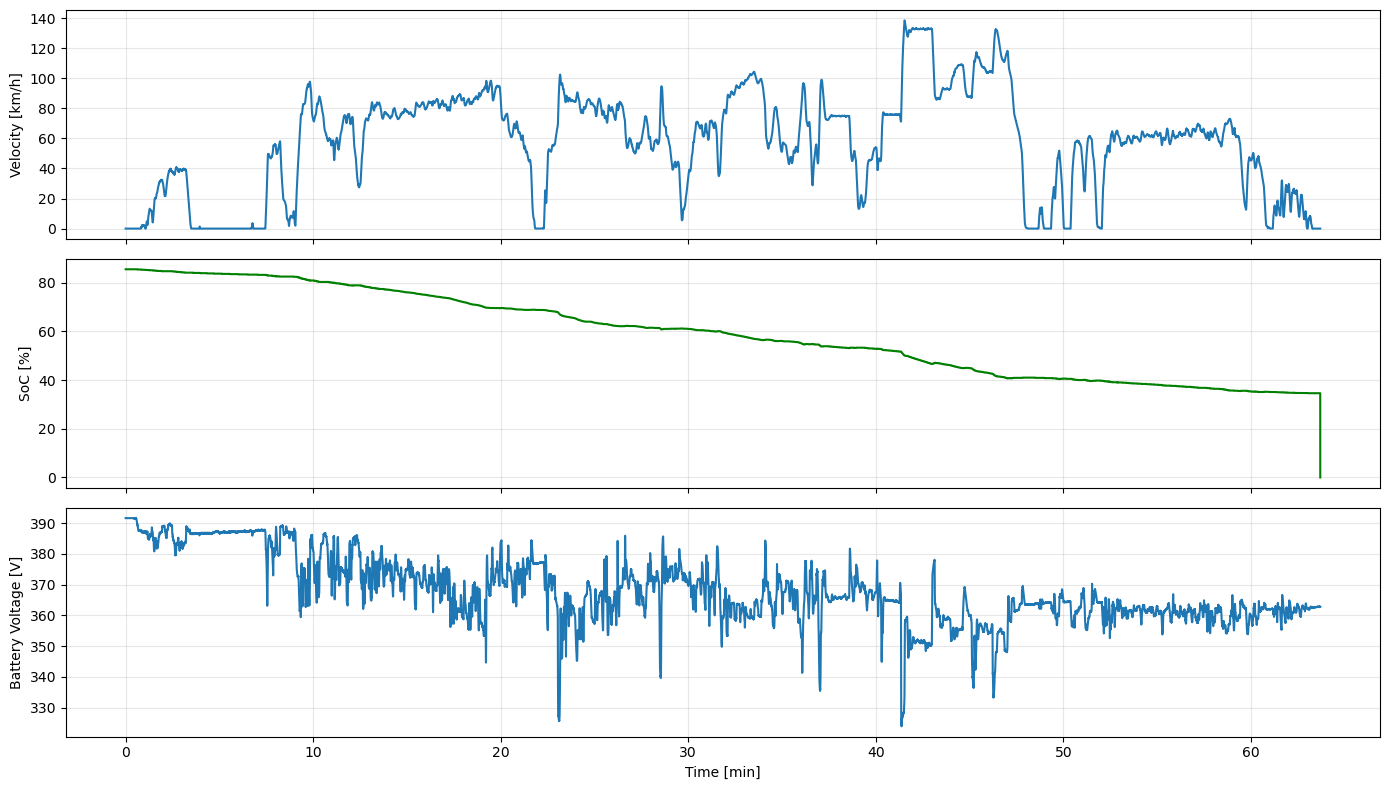

In [21]:
# Plot trip profile
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
time_min = df['Time [s]'] / 60

axes[0].plot(time_min, df['Velocity [km/h]'])
axes[0].set_ylabel('Velocity [km/h]')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time_min, df['SoC [%]'], color='green')
axes[1].set_ylabel('SoC [%]')
axes[1].grid(True, alpha=0.3)

axes[2].plot(time_min, df['Battery Voltage [V]'], label='Voltage')
axes[2].set_ylabel('Battery Voltage [V]')
axes[2].set_xlabel('Time [min]')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

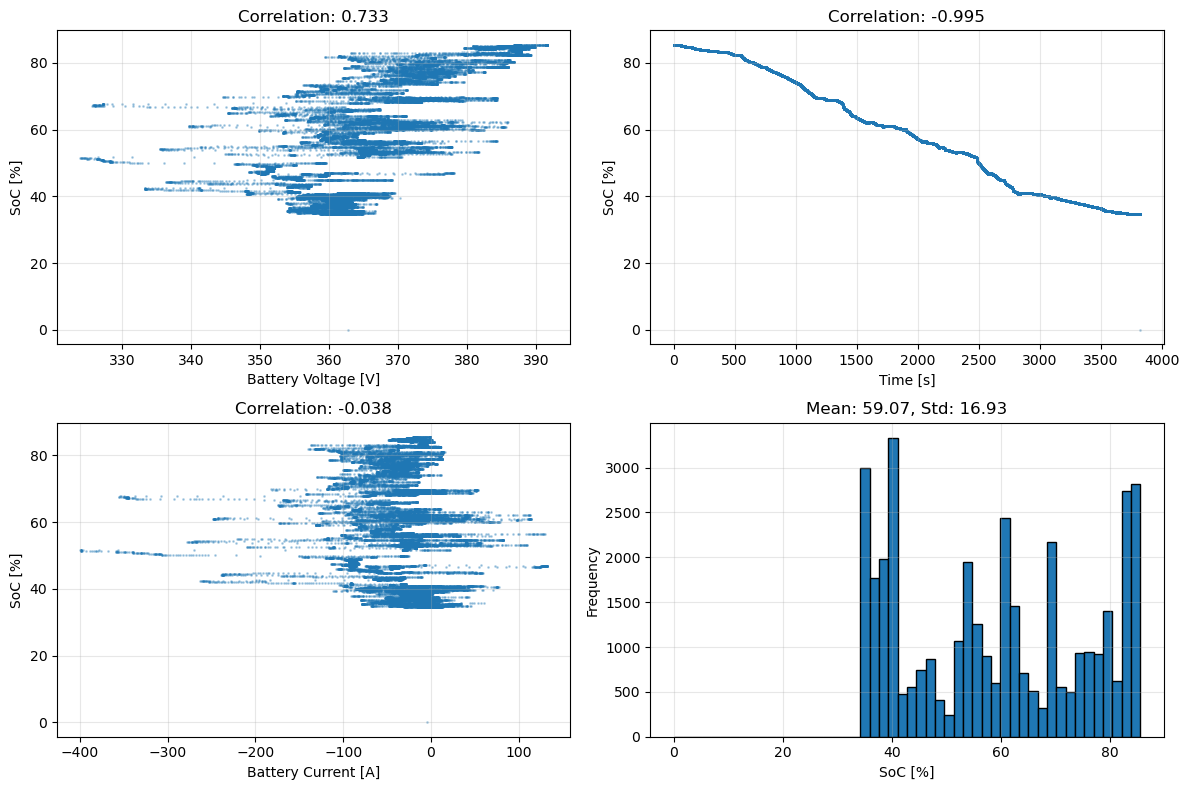

In [22]:
# Check key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# SoC vs Battery Voltage
axes[0, 0].scatter(df['Battery Voltage [V]'], df['SoC [%]'], s=1, alpha=0.3)
corr1 = df['Battery Voltage [V]'].corr(df['SoC [%]'])
axes[0, 0].set_xlabel('Battery Voltage [V]')
axes[0, 0].set_ylabel('SoC [%]')
axes[0, 0].set_title(f'Correlation: {corr1:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# SoC vs Time
axes[0, 1].scatter(df['Time [s]'], df['SoC [%]'], s=1, alpha=0.3)
corr2 = df['Time [s]'].corr(df['SoC [%]'])
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('SoC [%]')
axes[0, 1].set_title(f'Correlation: {corr2:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# SoC vs Battery Current
axes[1, 0].scatter(df['Battery Current [A]'], df['SoC [%]'], s=1, alpha=0.3)
corr3 = df['Battery Current [A]'].corr(df['SoC [%]'])
axes[1, 0].set_xlabel('Battery Current [A]')
axes[1, 0].set_ylabel('SoC [%]')
axes[1, 0].set_title(f'Correlation: {corr3:.3f}')
axes[1, 0].grid(True, alpha=0.3)

# SoC distribution
axes[1, 1].hist(df['SoC [%]'], bins=50, edgecolor='black')
axes[1, 1].set_xlabel('SoC [%]')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Mean: {df["SoC [%]"].mean():.2f}, Std: {df["SoC [%]"].std():.2f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Most important features for SOC prediction
print("="*70)
print("DATASET VALIDATION SUMMARY")
print("="*70)
print(f"\n✓ SoC decreases over time: {soc_start > soc_end}")
print(f"✓ Strong voltage-SoC correlation: {abs(df['Battery Voltage [V]'].corr(df['SoC [%]'])) > 0.5}")
print(f"✓ Multiple features with |corr| > 0.3: {(soc_correlations > 0.3).sum() - 1}")
print(f"\nTop 5 features for SOC prediction:")
for i, (feat, corr) in enumerate(soc_correlations[1:6].items(), 1):
    print(f"  {i}. {feat}: {corr:.3f}")
print("\n✓ Dataset is GENUINE (real EV data)")
print("="*70)

DATASET VALIDATION SUMMARY

✓ SoC decreases over time: True
✓ Strong voltage-SoC correlation: True
✓ Multiple features with |corr| > 0.3: 15

Top 5 features for SOC prediction:
  1. displayed SoC [%]: 1.000
  2. Time [s]: 0.995
  3. max. Battery Temperature [°C]: 0.993
  4. Battery Temperature [°C]: 0.989
  5. Battery Voltage [V]: 0.733

✓ Dataset is GENUINE (real EV data)
